## Bitcoin-Price-forecasting-Model

In [23]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [24]:
#let's read in our bitcoin data and parse the dates
df = pd.read_csv("C:\\Users\\moham\\Downloads\\projects\\Bitcoin-Price-Timeforecasting\\BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"]) #parse the date column and tell pandas column 1 is datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


We've collected the historical price of Bitcoin for the past 8 years but there are only 2787 samples.

Typically deep learning models usually have large sample size ranging from 100 thousands to millions.

The Seasonality of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year

In [26]:
# only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
...,...
2021-05-14,49764.13208
2021-05-15,50032.69314
2021-05-16,47885.62525


In [27]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Price of Bitcoin from 1 oct 2013 to 18 May 2021')

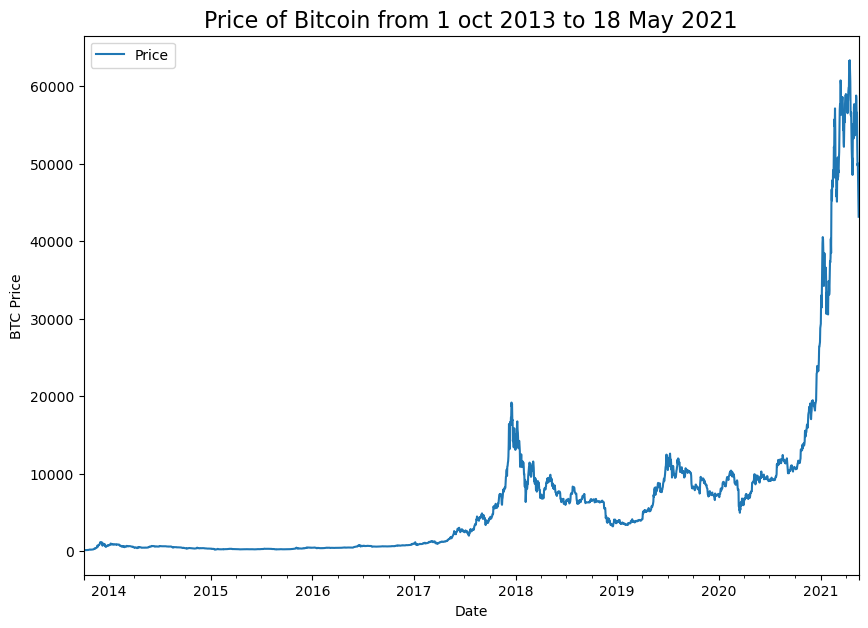

In [28]:
bitcoin_prices.plot(figsize = (10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2013 to 18 May 2021", fontsize = 16)

In [29]:
bitcoin_prices.describe()

,Price
count,2787.000000
mean,6529.845141
std,10887.847444
min,108.584830
25%,460.087500
50%,2780.182500
75%,8506.923720
max,63346.789040


Dataset doesn't have any missing values or other issues we can go ahead with model building.

#### Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10],  prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [32]:
# create train and test splits the right way for the time series data
split_size = int(0.8*len(prices)) #80%train 20% test

#create train data splits (everything before the split)
x_train, y_train = timesteps[:split_size], prices[:split_size]

#create test data splits (everything  beyond the split)
x_test, y_test = timesteps[split_size:], prices[split_size:]

len(x_train), len(y_train), len(x_test), len(y_test)

(2229, 2229, 558, 558)

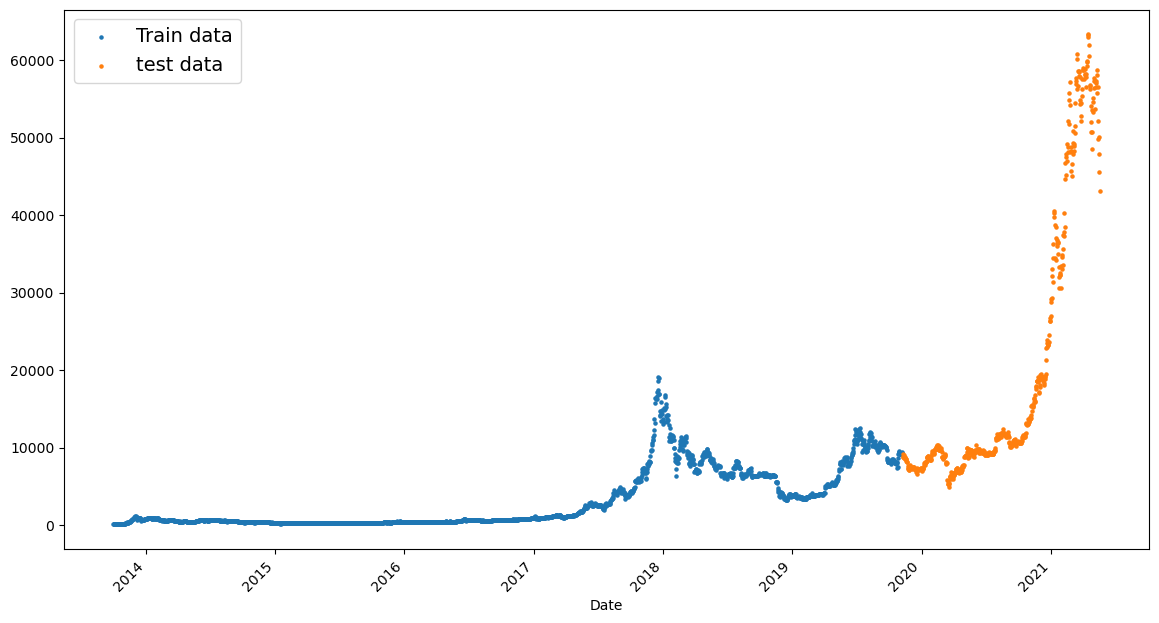

In [33]:
#plotting train test split
plt.figure(figsize = (14, 7))
plt.scatter(x_train, y_train, s = 5, label = "Train data")
plt.scatter(x_test, y_test, s = 5, label = "test data")
plt.xlabel("Date")
plt.xticks(rotation=45, ha="right")
plt.legend(fontsize = 14)
plt.show()

In [34]:
#create a function to plot time series data
def plot_time_series(timesteps, values, fomrat = ".", start = 0, end = None, label = None):
  """
  plots timesteps (a seires of points in time) against values (a series of valuesacross timesteps)

  Parameters
  -----------
  timesteps : array of timestep values
  value : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timestep)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values
  """

  #Plot the series
  plt.plot(timesteps[start:end], values[start:end])
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  plt.legend(fontsize = 14)
  plt.grid(True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


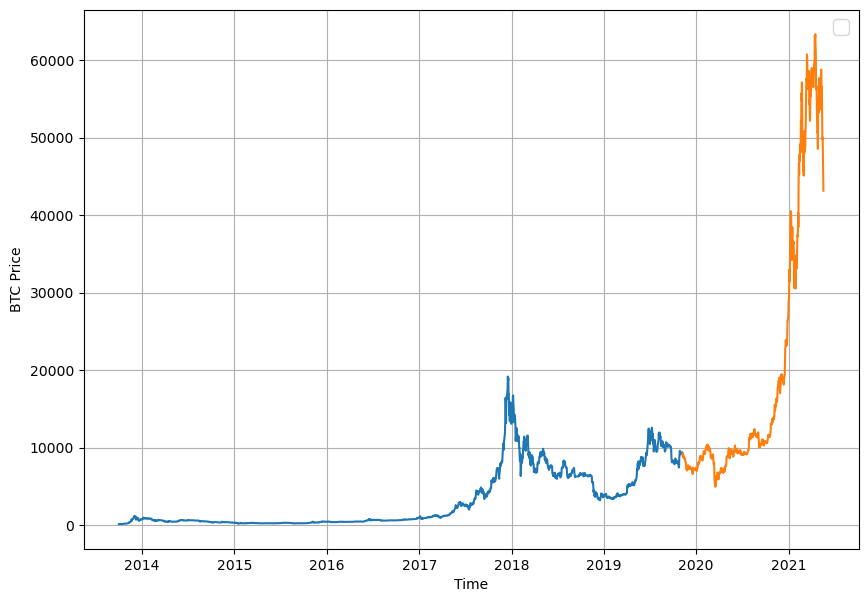

In [35]:
#Test our plotting function
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = x_train,
                 values = y_train,
                 label = "train data")

plot_time_series(timesteps = x_test,
                 values = y_test,
                 label = "test data")

### Model Building